In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

(x_train, y_train), (x_val, y_val) = tf.keras.datasets.mnist.load_data()
EPOCHS = 10000


2024-01-21 12:03:20.440224: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-01-21 12:03:20.481620: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-21 12:03:21.029337: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
x_train = x_train.astype('float32') / 255
x_val = x_val.astype('float32') / 255

In [3]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Flatten,Reshape

generator = Sequential()
generator.add(Dense(28*28 // 2, input_shape = (20,), activation='relu'))
generator.add(Dense(28*28, activation='sigmoid'))
generator.add(Reshape((28,28)))

discriminator = Sequential()
discriminator.add(Flatten(input_shape=(28, 28)))
discriminator.add(Dense(28*28 // 2, activation='relu'))
discriminator.add(Dense(1))

2024-01-21 12:03:22.117387: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2024-01-21 12:03:22.117439: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dziobak
2024-01-21 12:03:22.117447: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dziobak
2024-01-21 12:03:22.117545: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 520.61.5
2024-01-21 12:03:22.117569: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 520.61.5
2024-01-21 12:03:22.117575: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 520.61.5


In [4]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits = True)
def G_loss(D, x_fake):
  return cross_entropy(tf.ones_like(D(x_fake)), D(x_fake))
def D_loss(D, x_real, x_fake):
  return cross_entropy(tf.ones_like(D(x_real)), D(x_real)) + cross_entropy(tf.zeros_like(D(x_fake)), D(x_fake))

# Optimizers
G_opt = tf.keras.optimizers.Adam(1e-4)
D_opt = tf.keras.optimizers.Adam(1e-4)

2024-01-21 12:03:23.722179: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28]
	 [[{{node Placeholder/_0}}]]
2024-01-21 12:03:23.722425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype float and shape [60000,28,28]
	 [[{{node Placeholder/_0}}]]


epoch: 1; G_loss: 0.430521; D_loss: 1.502112


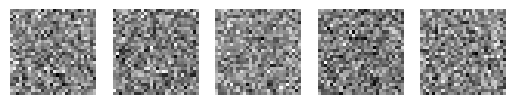

epoch: 101; G_loss: 4.375001; D_loss: 0.042053


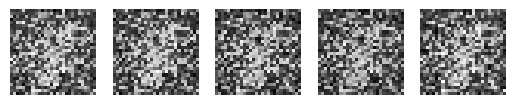

epoch: 201; G_loss: 4.937821; D_loss: 0.024558


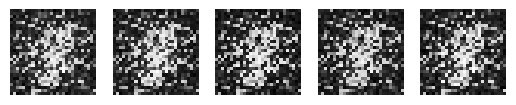

epoch: 301; G_loss: 5.082762; D_loss: 0.029158


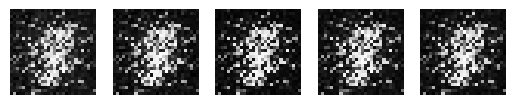

epoch: 401; G_loss: 4.702584; D_loss: 0.065261


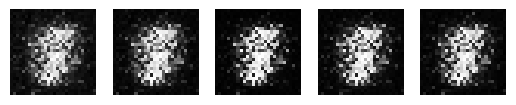

epoch: 501; G_loss: 2.968605; D_loss: 0.265812


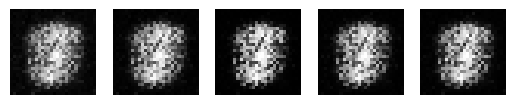

epoch: 601; G_loss: 2.322789; D_loss: 0.283523


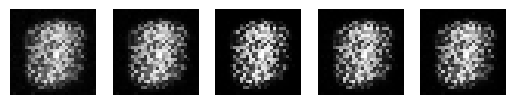

epoch: 701; G_loss: 2.463262; D_loss: 0.245092


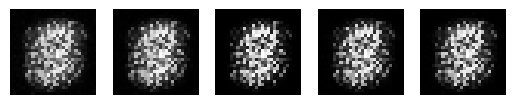

epoch: 801; G_loss: 2.599265; D_loss: 0.170218


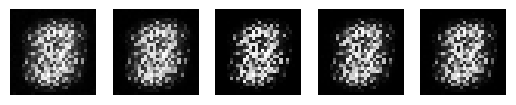

epoch: 901; G_loss: 2.942508; D_loss: 0.125126


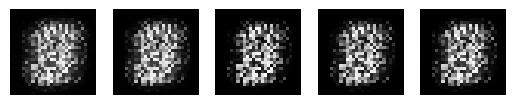

epoch: 1001; G_loss: 3.183085; D_loss: 0.088767


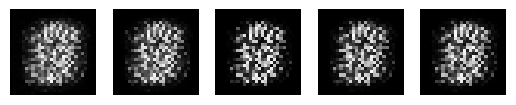

epoch: 1101; G_loss: 3.140907; D_loss: 0.087698


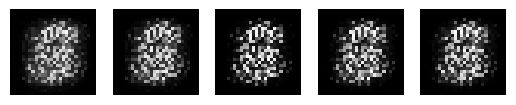

epoch: 1201; G_loss: 2.847118; D_loss: 0.125338


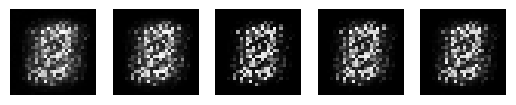

epoch: 1301; G_loss: 2.973578; D_loss: 0.130483


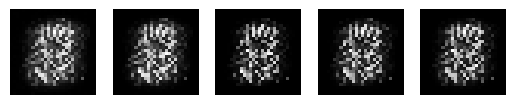

epoch: 1401; G_loss: 2.618543; D_loss: 0.148952


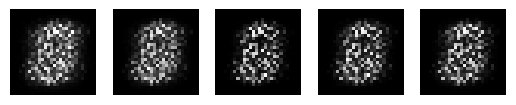

epoch: 1501; G_loss: 2.639449; D_loss: 0.141511


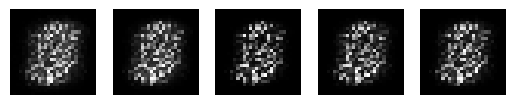

epoch: 1601; G_loss: 2.405887; D_loss: 0.154418


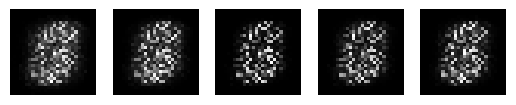

epoch: 1701; G_loss: 2.331852; D_loss: 0.228129


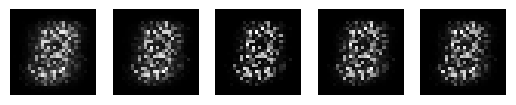

epoch: 1801; G_loss: 2.405007; D_loss: 0.172458


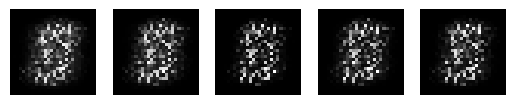

epoch: 1901; G_loss: 2.528085; D_loss: 0.168715


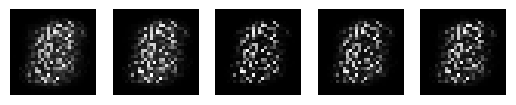

epoch: 2001; G_loss: 2.377187; D_loss: 0.145887


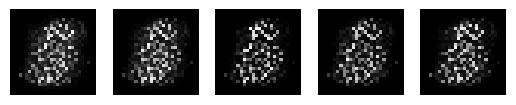

epoch: 2101; G_loss: 2.463519; D_loss: 0.185018


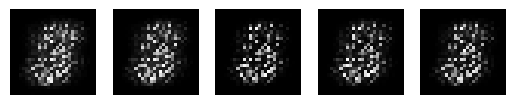

epoch: 2201; G_loss: 2.450405; D_loss: 0.247165


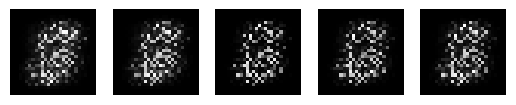

epoch: 2301; G_loss: 2.546801; D_loss: 0.178390


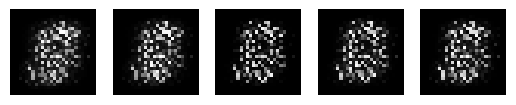

epoch: 2401; G_loss: 3.001274; D_loss: 0.127072


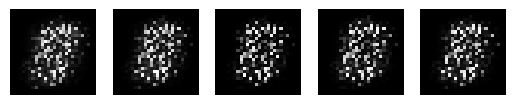

epoch: 2501; G_loss: 2.934544; D_loss: 0.143985


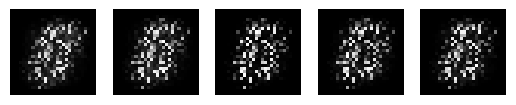

epoch: 2601; G_loss: 3.404563; D_loss: 0.102153


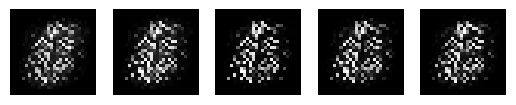

epoch: 2701; G_loss: 3.167386; D_loss: 0.105405


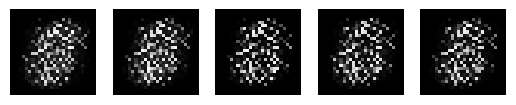

epoch: 2801; G_loss: 3.466546; D_loss: 0.115061


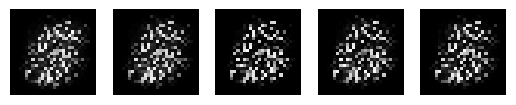

epoch: 2901; G_loss: 3.392880; D_loss: 0.085152


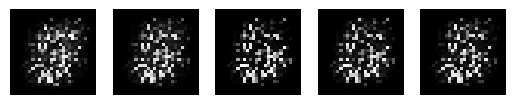

epoch: 3001; G_loss: 3.306682; D_loss: 0.149912


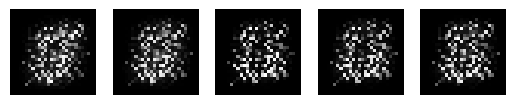

epoch: 3101; G_loss: 3.153802; D_loss: 0.079443


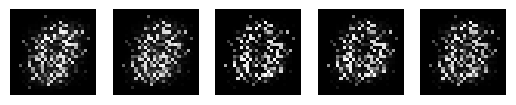

epoch: 3201; G_loss: 3.839830; D_loss: 0.069913


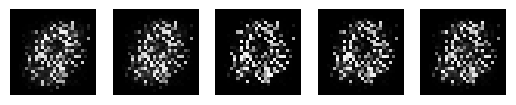

epoch: 3301; G_loss: 3.970009; D_loss: 0.066959


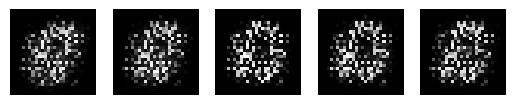

epoch: 3401; G_loss: 3.877713; D_loss: 0.059299


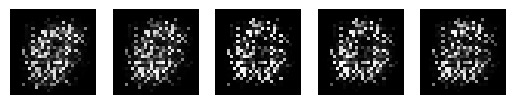

epoch: 3501; G_loss: 4.108494; D_loss: 0.066920


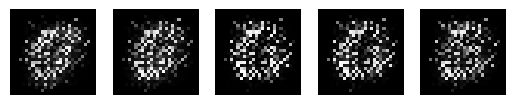

epoch: 3601; G_loss: 4.141136; D_loss: 0.055745


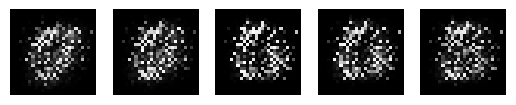

epoch: 3701; G_loss: 3.924438; D_loss: 0.060516


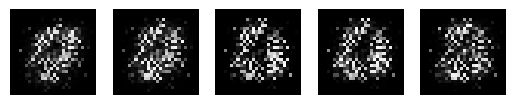

epoch: 3801; G_loss: 4.603530; D_loss: 0.055420


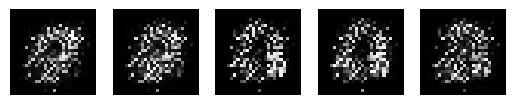

epoch: 3901; G_loss: 4.176556; D_loss: 0.046356


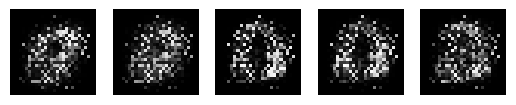

epoch: 4001; G_loss: 4.306715; D_loss: 0.065230


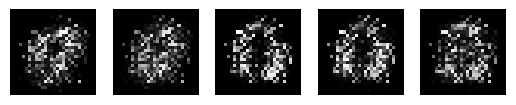

epoch: 4101; G_loss: 3.946867; D_loss: 0.073573


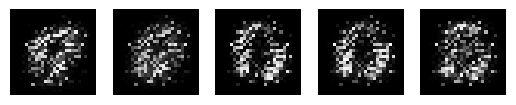

epoch: 4201; G_loss: 3.811060; D_loss: 0.113684


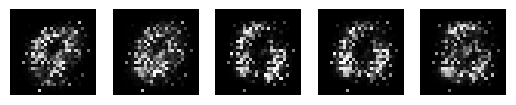

epoch: 4301; G_loss: 3.137964; D_loss: 0.196863


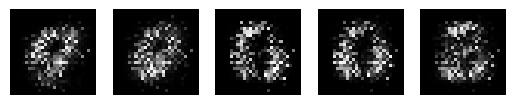

epoch: 4401; G_loss: 3.255669; D_loss: 0.170938


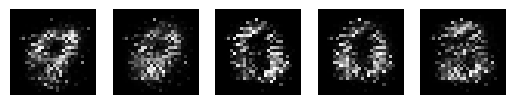

epoch: 4501; G_loss: 2.927586; D_loss: 0.185488


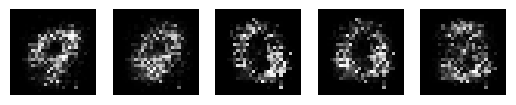

epoch: 4601; G_loss: 3.258528; D_loss: 0.194103


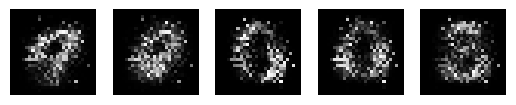

epoch: 4701; G_loss: 2.763489; D_loss: 0.272210


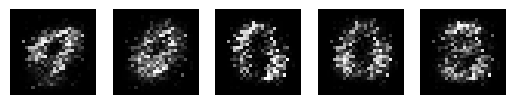

epoch: 4801; G_loss: 3.121936; D_loss: 0.211989


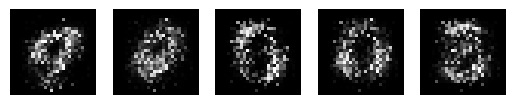

epoch: 4901; G_loss: 2.694265; D_loss: 0.189019


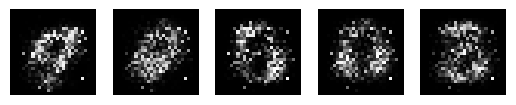

epoch: 5001; G_loss: 2.948635; D_loss: 0.210169


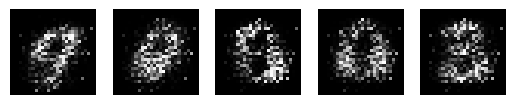

epoch: 5101; G_loss: 3.086957; D_loss: 0.274296


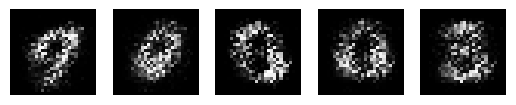

epoch: 5201; G_loss: 3.107349; D_loss: 0.153912


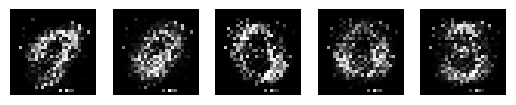

epoch: 5301; G_loss: 3.594227; D_loss: 0.159531


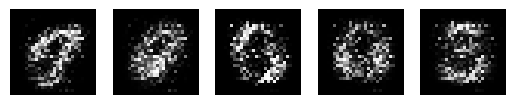

epoch: 5401; G_loss: 3.649404; D_loss: 0.165518


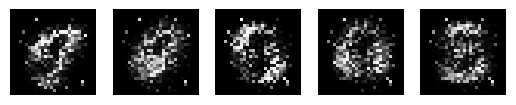

epoch: 5501; G_loss: 3.173242; D_loss: 0.240555


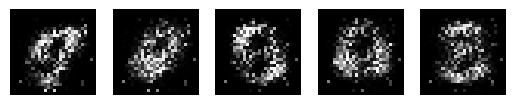

epoch: 5601; G_loss: 3.334472; D_loss: 0.172874


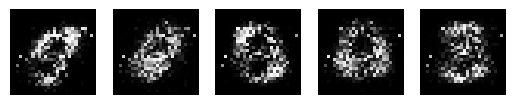

epoch: 5701; G_loss: 3.622907; D_loss: 0.130652


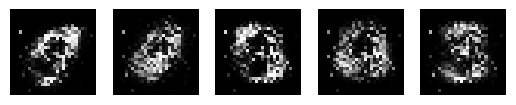

epoch: 5801; G_loss: 3.038402; D_loss: 0.202610


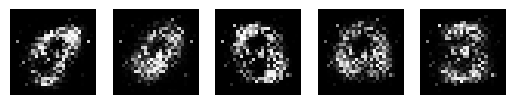

epoch: 5901; G_loss: 3.887596; D_loss: 0.146664


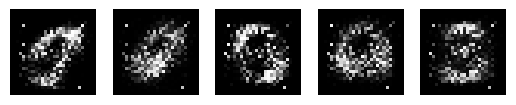

epoch: 6001; G_loss: 3.658859; D_loss: 0.140244


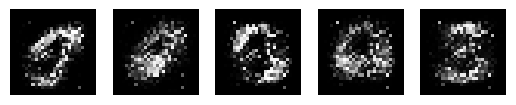

epoch: 6101; G_loss: 3.287601; D_loss: 0.134385


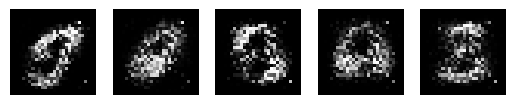

epoch: 6201; G_loss: 3.705992; D_loss: 0.115008


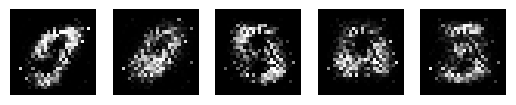

epoch: 6301; G_loss: 3.454857; D_loss: 0.119370


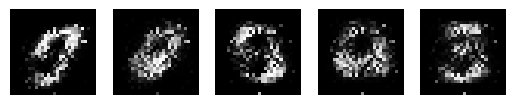

epoch: 6401; G_loss: 3.386626; D_loss: 0.116084


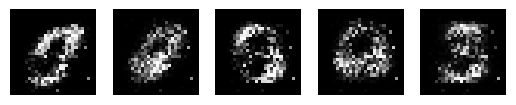

epoch: 6501; G_loss: 3.257180; D_loss: 0.157436


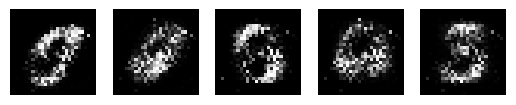

epoch: 6601; G_loss: 3.669494; D_loss: 0.125393


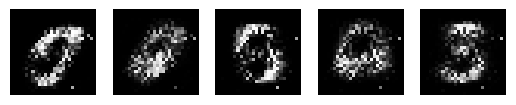

epoch: 6701; G_loss: 3.485327; D_loss: 0.109530


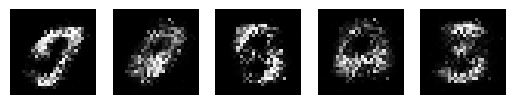

epoch: 6801; G_loss: 3.216003; D_loss: 0.168702


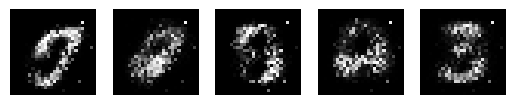

epoch: 6901; G_loss: 2.925508; D_loss: 0.206278


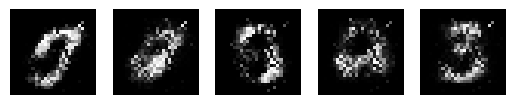

epoch: 7001; G_loss: 2.979460; D_loss: 0.163732


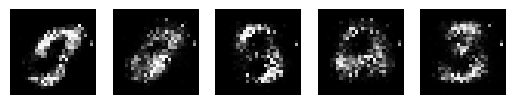

epoch: 7101; G_loss: 3.287173; D_loss: 0.158512


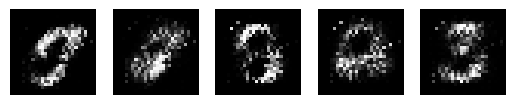

epoch: 7201; G_loss: 3.241792; D_loss: 0.153394


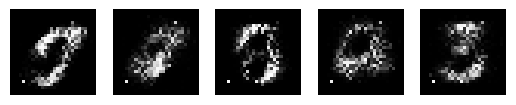

epoch: 7301; G_loss: 3.095022; D_loss: 0.211973


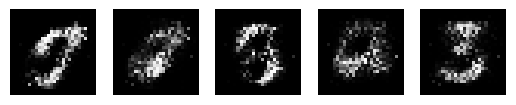

epoch: 7401; G_loss: 3.346552; D_loss: 0.140975


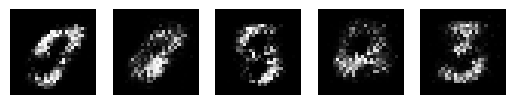

epoch: 7501; G_loss: 3.331329; D_loss: 0.155847


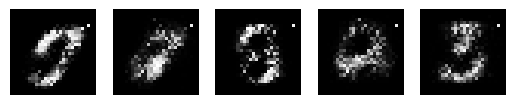

epoch: 7601; G_loss: 3.016375; D_loss: 0.231914


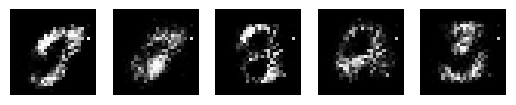

epoch: 7701; G_loss: 3.147753; D_loss: 0.165832


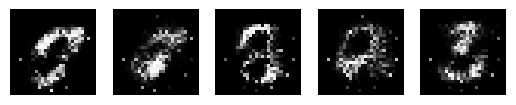

epoch: 7801; G_loss: 3.451531; D_loss: 0.147993


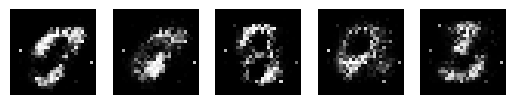

epoch: 7901; G_loss: 3.165118; D_loss: 0.156889


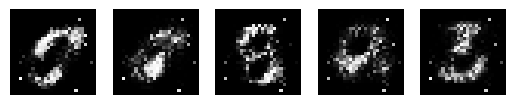

epoch: 8001; G_loss: 3.367970; D_loss: 0.143708


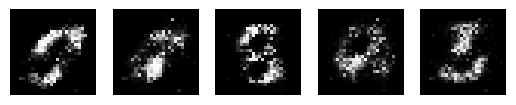

epoch: 8101; G_loss: 2.961261; D_loss: 0.207876


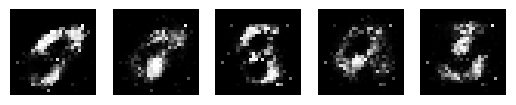

epoch: 8201; G_loss: 3.302254; D_loss: 0.198896


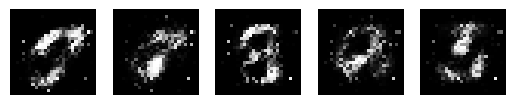

epoch: 8301; G_loss: 3.631569; D_loss: 0.106924


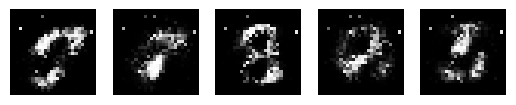

epoch: 8401; G_loss: 3.340016; D_loss: 0.156388


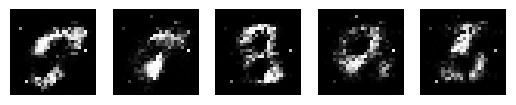

epoch: 8501; G_loss: 3.273905; D_loss: 0.134550


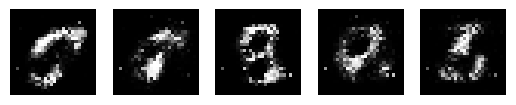

epoch: 8601; G_loss: 3.708743; D_loss: 0.115785


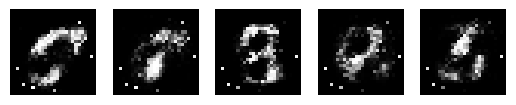

epoch: 8701; G_loss: 3.333852; D_loss: 0.171927


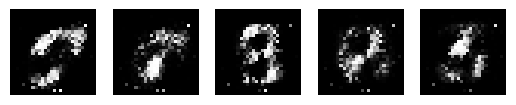

epoch: 8801; G_loss: 3.088259; D_loss: 0.168663


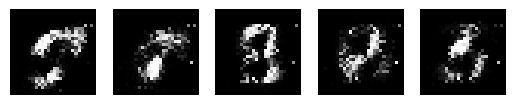

epoch: 8901; G_loss: 3.634069; D_loss: 0.084935


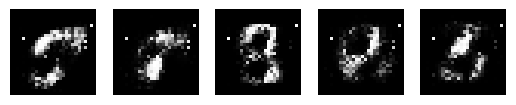

epoch: 9001; G_loss: 3.919633; D_loss: 0.117591


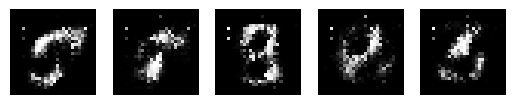

epoch: 9101; G_loss: 3.256369; D_loss: 0.123539


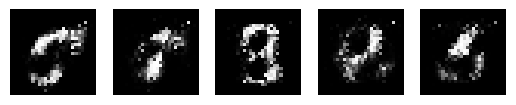

epoch: 9201; G_loss: 3.497356; D_loss: 0.124206


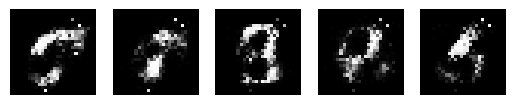

epoch: 9301; G_loss: 3.454584; D_loss: 0.184325


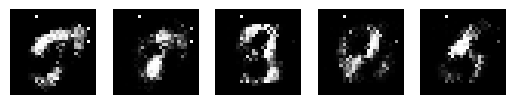

epoch: 9401; G_loss: 3.006746; D_loss: 0.166401


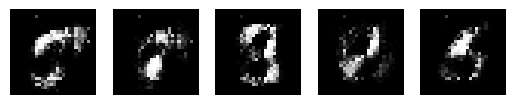

epoch: 9501; G_loss: 3.189739; D_loss: 0.150965


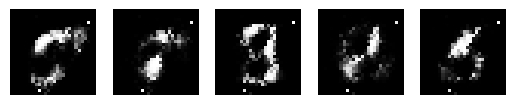

epoch: 9601; G_loss: 3.357376; D_loss: 0.221609


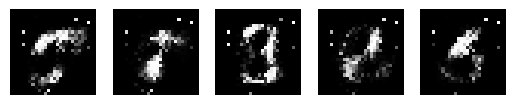

epoch: 9701; G_loss: 3.756083; D_loss: 0.116854


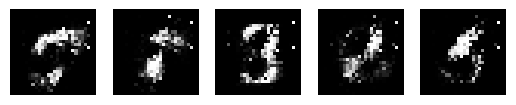

epoch: 9801; G_loss: 4.097223; D_loss: 0.066462


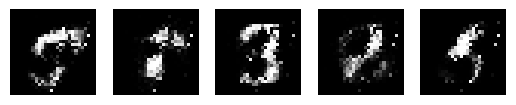

epoch: 9901; G_loss: 3.595872; D_loss: 0.154649


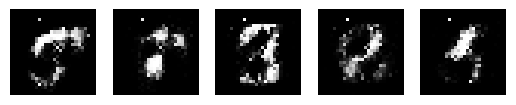

In [5]:
batch_size = 100
x_iter = iter(tf.data.Dataset.from_tensor_slices(x_train).shuffle(4 * batch_size).batch(batch_size).repeat())
z_vis = tf.random.normal([10, 20])

for epoch in range(EPOCHS):
    z_mb = tf.random.normal([batch_size, 20])
    x_real = next(x_iter)
    # Record operations
    with tf.GradientTape() as G_tape, tf.GradientTape() as D_tape:  
        x_fake = generator(z_mb)
        G_loss_curr = G_loss(discriminator, x_fake)
        D_loss_curr = D_loss(discriminator, x_real, x_fake)
    # Gradients
    G_grad = G_tape.gradient(G_loss_curr, generator.trainable_variables)
    D_grad = D_tape.gradient(D_loss_curr, discriminator.trainable_variables)
    # Apply gradients
    G_opt.apply_gradients(zip(G_grad, generator.trainable_variables))
    D_opt.apply_gradients(zip(D_grad, discriminator.trainable_variables))
    
    if epoch % 100 == 0:
        # Print results
        print('epoch: {}; G_loss: {:.6f}; D_loss: {:.6f}'.format(epoch+1, G_loss_curr, D_loss_curr))
        # Plot generated images
        for i in range(5):
            plt.subplot(1, 5, i+1)
            plt.imshow(generator(z_vis)[i,:,:]*255.0, cmap="gray")
            plt.axis('off')
        plt.show()